In [11]:
import json
#./MSIRRT/build/get_safe_intevals_by_path ./mass_test/tests/260_spheres/test_number_2/MSIRRT_planner_logs_1729820854.json ./mass_test/tests/260_spheres/test_number_2/scene_task.json 30
with open('./safe_intervals.json','r') as f:
    arr = json.load(f)
    
with open('./safe_intervals_strrt.json','r') as f:
    arr_strrt = json.load(f)
    

607it [00:07, 79.60it/s]  
405it [00:00, 1094518.76it/s]


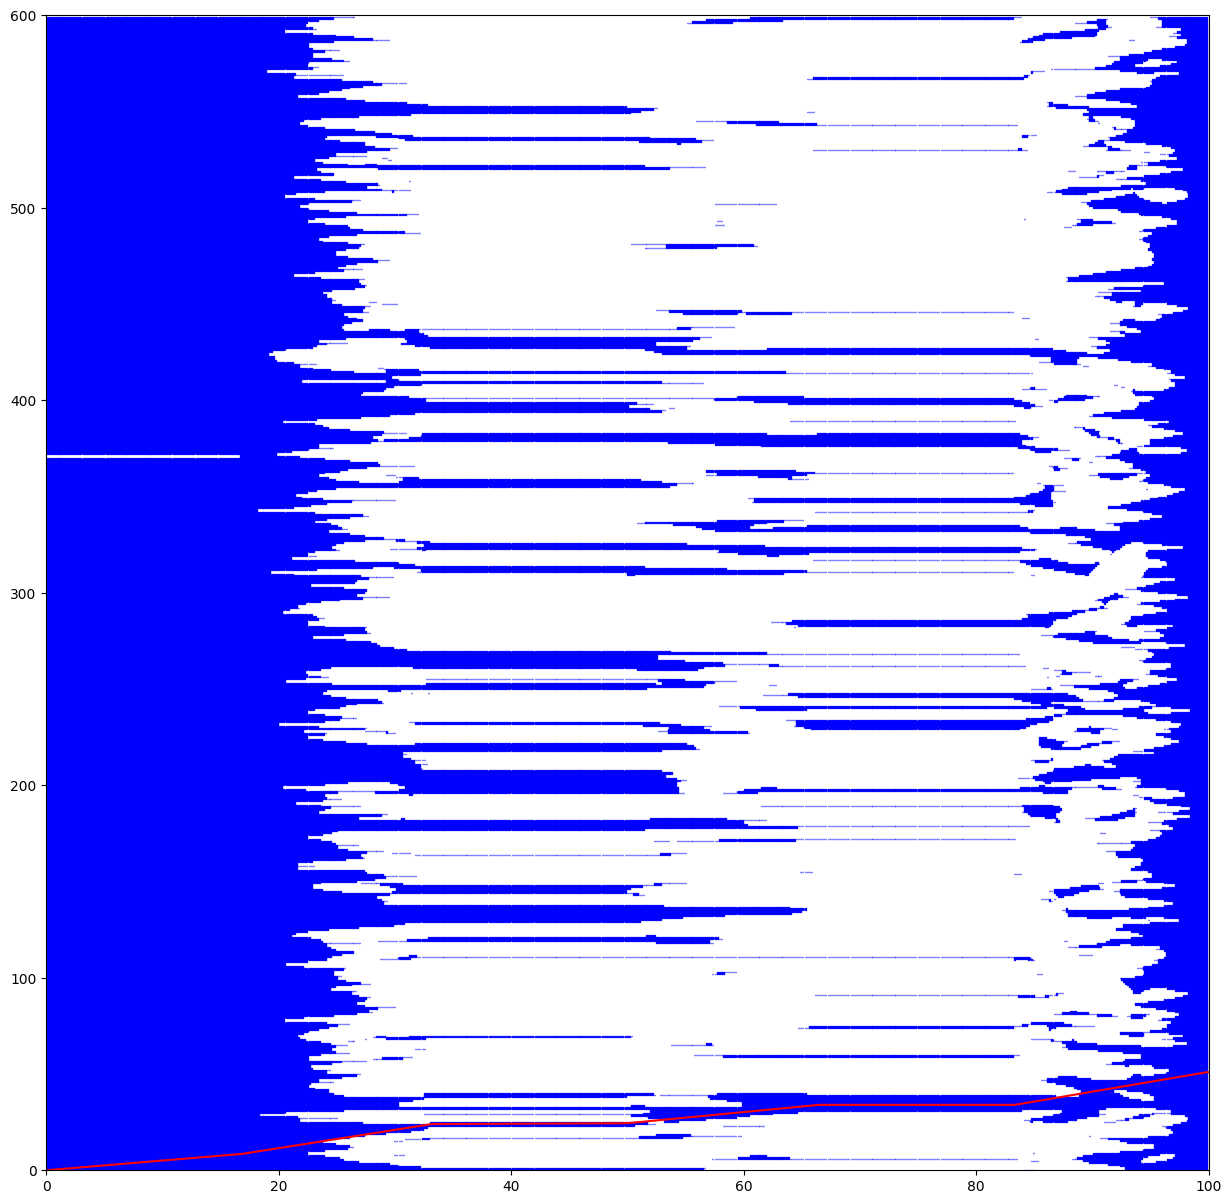

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 15]
import numpy as np
from tqdm import tqdm
fig, ax = plt.subplots()

path_size = len(arr["final_interpolated_path"])
# 0 ==0
#path_size == 100
# rect_width = 100/(2*path_size)
rect_width = 100/(path_size)
path = [0]*path_size
for path_id,coords_and_safe_ints in tqdm(enumerate(arr["final_interpolated_path"])):
    
    coord = path_id*100/path_size
    path[path_id]=coords_and_safe_ints["time"]*30
    for safe_ints in coords_and_safe_ints["safe_intervals"]:
        rect = Rectangle((path_id*rect_width-rect_width/2, safe_ints[0]), width=rect_width/2, height=safe_ints[1]-safe_ints[0], 
                        edgecolor='blue', facecolor='lightblue')
        ax.add_patch(rect)
        
path_size_strrt = len(arr_strrt["final_interpolated_path"])
path_strrt = [0]*path_size_strrt
for path_id,coords_and_safe_ints in tqdm(enumerate(arr_strrt["final_interpolated_path"])):
    
    coord = path_id*100/path_size
    path_strrt[path_id]=coords_and_safe_ints["time"]*30
    

ax.set_xlim(0,100)
ax.set_ylim(0, 600)
# ax.set_aspect('equal')
plt.grid(True)
# plt.title('Drawing Shapes in Matplotlib')
ax.grid(False)
plt.plot(list(np.linspace(0,100,path_size)),path,c = 'r')
# plt.plot(list(np.linspace(0,100,path_size_strrt)),path_strrt,c = 'g')
plt.savefig('safe_ints.pdf')
plt.show()



In [ ]:
for path_id,coords_and_safe_ints in tqdm(enumerate(arr["final_interpolated_path"])):
    
    coord = path_id*100/path_size
    frame=coords_and_safe_ints["time"]*30
    is_ok = False
    for safe_ints in coords_and_safe_ints["safe_intervals"]:
        